In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)

df = sns.load_dataset('car_crashes')
print('Dimensões do dataset:', df.shape)

Dimensões do dataset: (51, 8)


In [39]:
print('\nPrimeiras 5 linhas do dataset:')
print(df.head())

print('\nEstatísticas descritivas:')
print(df.describe())


Primeiras 5 linhas do dataset:
   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  

Estatísticas descritivas:
           total   speeding    alcohol  not_distracted  no_previous  \
count  51.000000  51.000000  51.000000       51.000000    51.000000   
mean   15.790196   4.998196   4.886784       13.573176    14.004882   
std     4.122002   2.017747   1.729133        4.508977     3.764672   
min     5.900000   1.792000   1.593000        1.760000     5.900000   
25%    12

In [ ]:
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

print('Valores faltantes por coluna:')
for col, missing in missing_percentages.items():
    print(f'{col}: {missing:.2f}%')

Valores faltantes por coluna:
total: 0.00%
speeding: 0.00%
alcohol: 0.00%
not_distracted: 0.00%
no_previous: 0.00%
ins_premium: 0.00%
ins_losses: 0.00%
abbrev: 0.00%


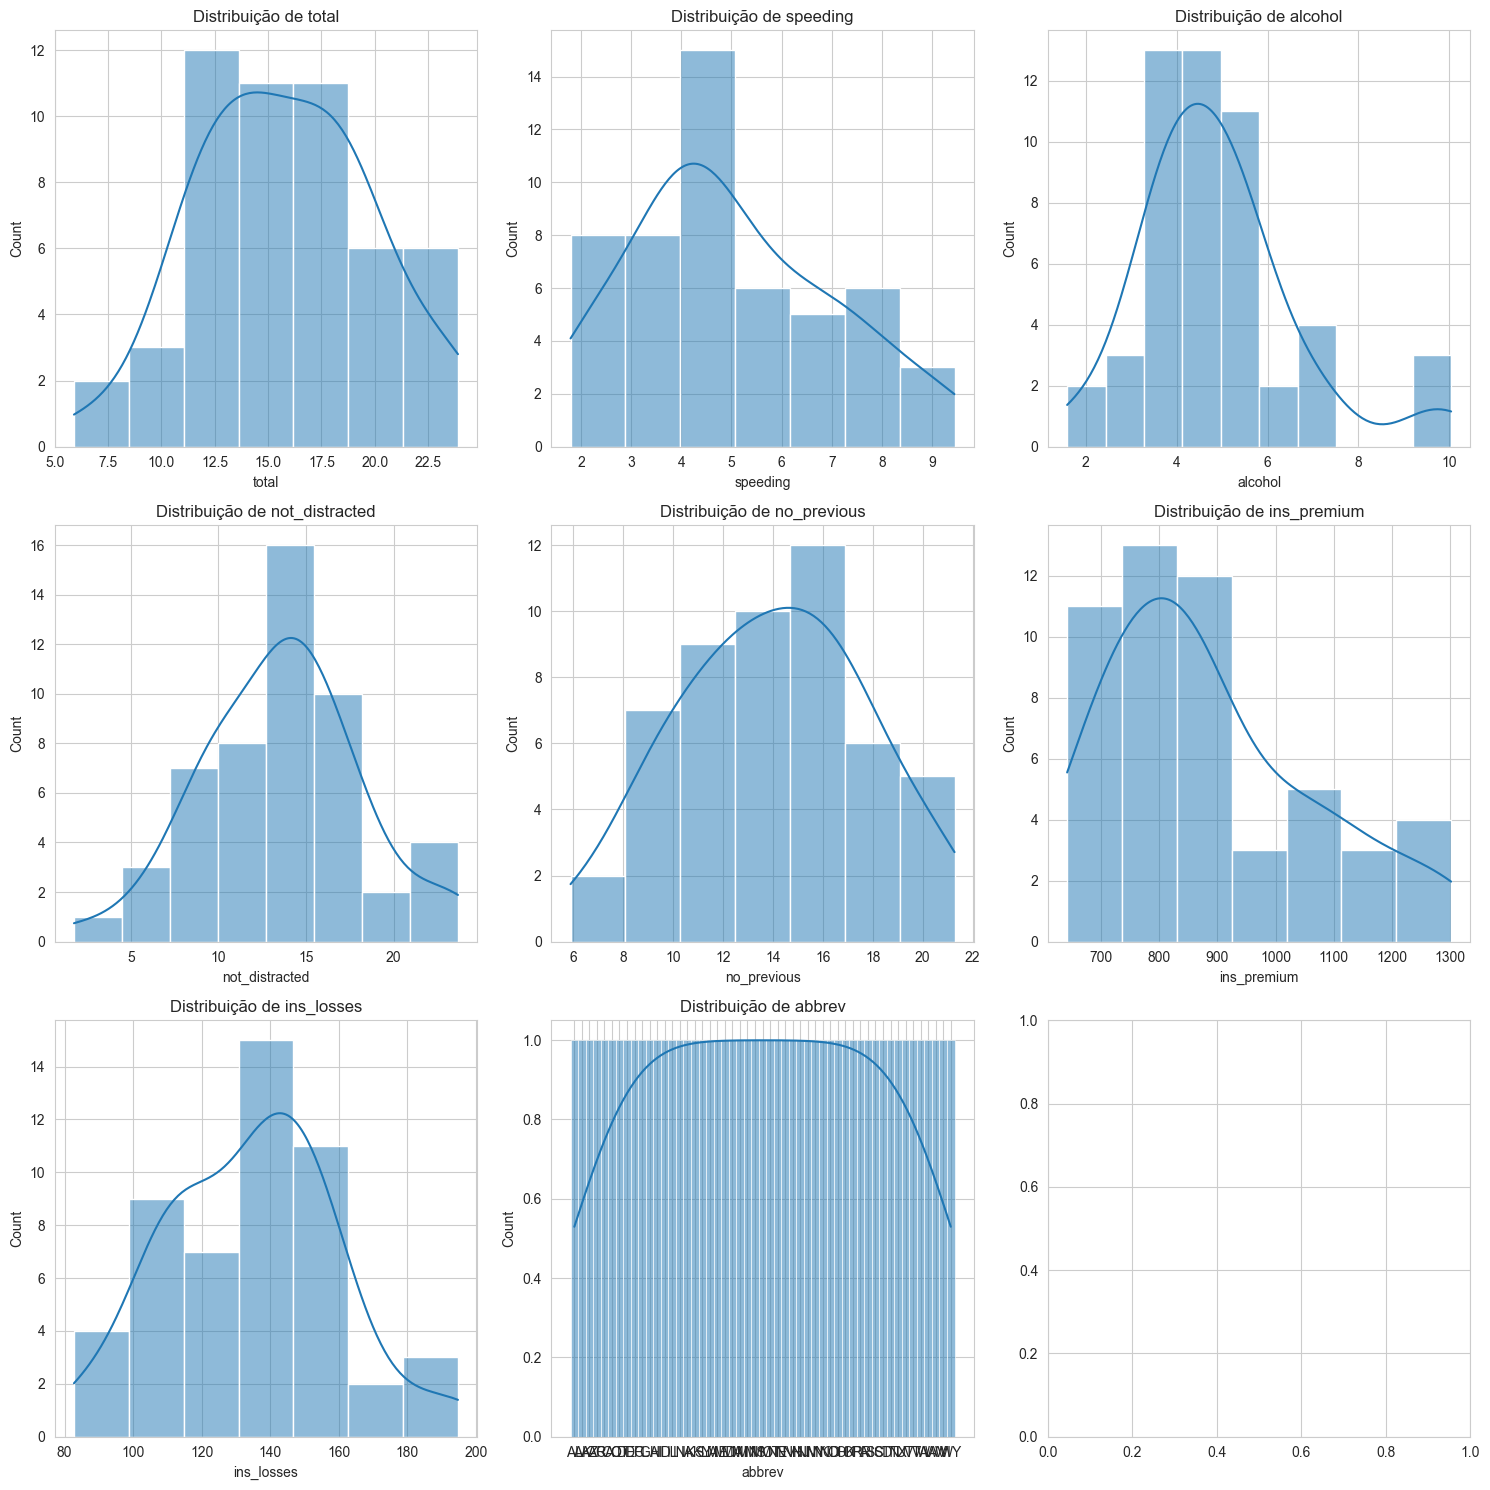

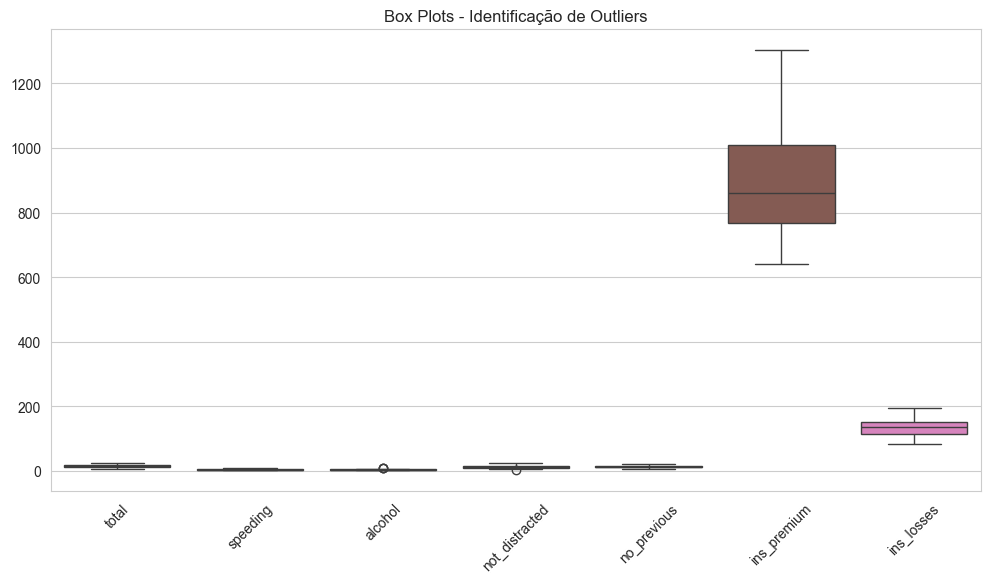

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for idx, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, ax=axes[idx], kde=True)
    axes[idx].set_title(f'Distribuição de {col}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Box Plots - Identificação de Outliers')
plt.show()

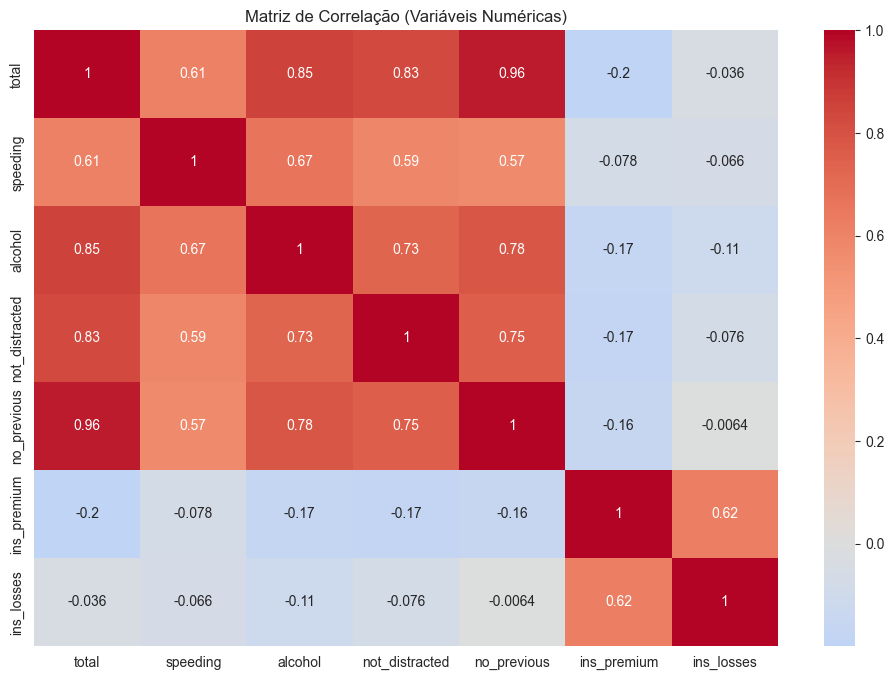


Correlações mais fortes (apenas variáveis numéricas):
total           no_previous       0.956179
no_previous     total             0.956179
alcohol         total             0.852613
total           alcohol           0.852613
not_distracted  total             0.827560
total           not_distracted    0.827560
no_previous     alcohol           0.783520
alcohol         no_previous       0.783520
no_previous     not_distracted    0.747307
not_distracted  no_previous       0.747307
dtype: float64


In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação (Variáveis Numéricas)')
plt.show()

print('\nCorrelações mais fortes (apenas variáveis numéricas):')
correlations = correlation_matrix.unstack()
sorted_correlations = correlations.sort_values(key=abs, ascending=False)
print(sorted_correlations[sorted_correlations != 1.0][:10])

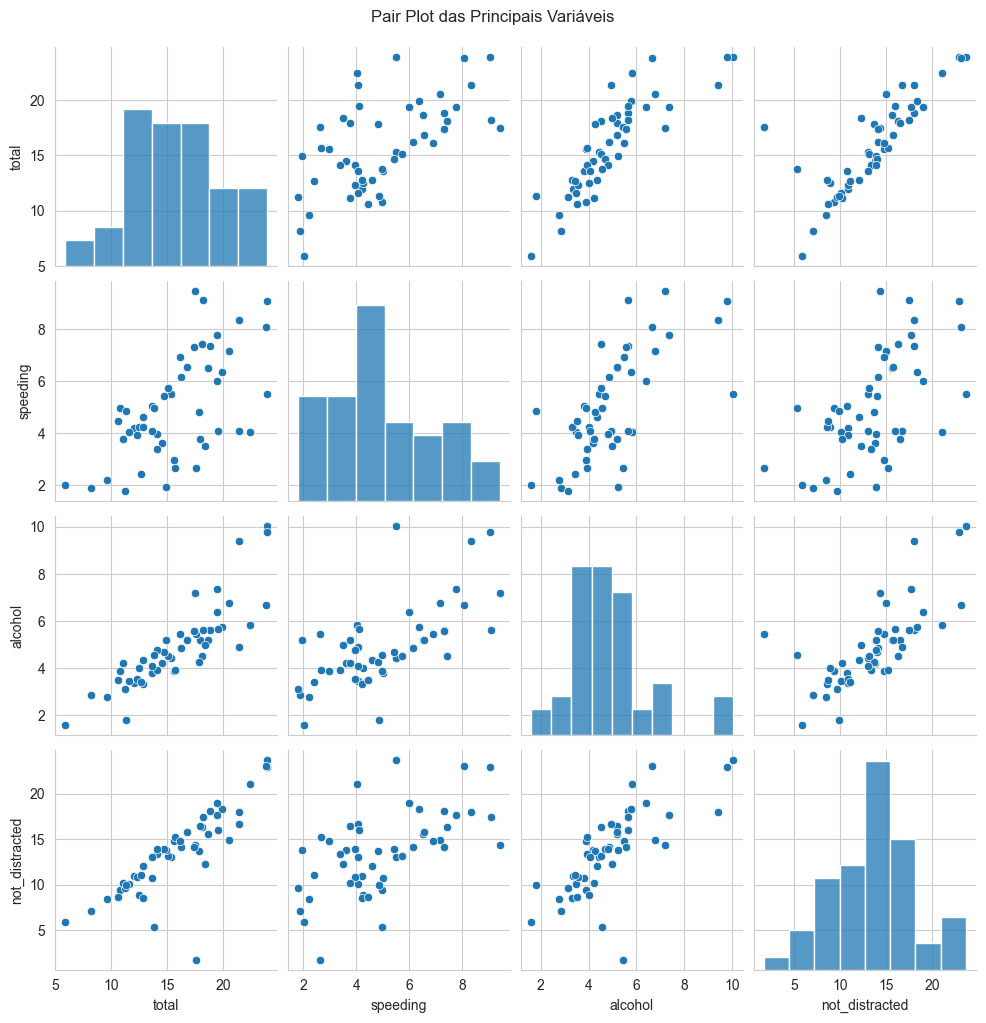

In [ ]:
sns.pairplot(df[['total', 'speeding', 'alcohol', 'not_distracted']])
plt.suptitle('Pair Plot das Principais Variáveis', y=1.02)
plt.show()

In [ ]:
outliers_summary = {}
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outliers_summary[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers_count': len(outliers),
        'outliers_indices': outliers.index.tolist()
    }
    
    print(f'{col}:')
    print(f'  Q1: {Q1:.3f}, Q3: {Q3:.3f}, IQR: {IQR:.3f}')
    print(f'  Limites: [{lower_bound:.3f}, {upper_bound:.3f}]')
    print(f'  Outliers encontrados: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)')
    
    if len(outliers) > 0:
        print(f'  Índices com outliers: {outliers.index.tolist()}')
    print()

Análise de Outliers por Coluna:

total:
  Q1: 12.750, Q3: 18.500, IQR: 5.750
  Limites: [4.125, 27.125]
  Outliers encontrados: 0 (0.0%)

speeding:
  Q1: 3.766, Q3: 6.439, IQR: 2.673
  Limites: [-0.242, 10.448]
  Outliers encontrados: 0 (0.0%)

alcohol:
  Q1: 3.894, Q3: 5.604, IQR: 1.710
  Limites: [1.329, 8.169]
  Outliers encontrados: 3 (5.9%)
  Índices com outliers: [26, 34, 40]

not_distracted:
  Q1: 10.478, Q3: 16.140, IQR: 5.662
  Limites: [1.985, 24.633]
  Outliers encontrados: 1 (2.0%)
  Índices com outliers: [24]

no_previous:
  Q1: 11.348, Q3: 16.755, IQR: 5.407
  Limites: [3.237, 24.865]
  Outliers encontrados: 0 (0.0%)

ins_premium:
  Q1: 768.430, Q3: 1007.945, IQR: 239.515
  Limites: [409.158, 1367.217]
  Outliers encontrados: 0 (0.0%)

ins_losses:
  Q1: 114.645, Q3: 151.870, IQR: 37.225
  Limites: [58.807, 207.708]
  Outliers encontrados: 0 (0.0%)



In [ ]:
def remove_outliers(df, columns=None):
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    
    df_clean = df.copy()
    outliers_removed = []
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_mask = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
        outliers_indices = df_clean[outliers_mask].index.tolist()
        outliers_removed.extend(outliers_indices)
        
        df_clean = df_clean[~outliers_mask]
    
    return df_clean, list(set(outliers_removed))

def winsorize_outliers(df, columns=None, lower_percentile=0.05, upper_percentile=0.95):
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    
    df_winsorized = df.copy()
    
    for col in columns:
        lower_limit = df_winsorized[col].quantile(lower_percentile)
        upper_limit = df_winsorized[col].quantile(upper_percentile)
        
        df_winsorized[col] = df_winsorized[col].clip(lower=lower_limit, upper=upper_limit)
    
    return df_winsorized

def replace_outliers_median(df, columns=None):
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    
    df_median = df.copy()
    
    for col in columns:
        Q1 = df_median[col].quantile(0.25)
        Q3 = df_median[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        median_value = df_median[col].median()
        outliers_mask = (df_median[col] < lower_bound) | (df_median[col] > upper_bound)
        df_median.loc[outliers_mask, col] = median_value
    
    return df_median

Métodos de tratamento de outliers disponíveis:

Funções de tratamento definidas!


In [ ]:
print(f'Dataset original: {df.shape[0]} observações')

df_removed, removed_indices = remove_outliers(df)
print(f'Após remoção de outliers: {df_removed.shape[0]} observações')
print(f'Observações removidas: {len(removed_indices)} ({len(removed_indices)/len(df)*100:.1f}%)')
if removed_indices:
    print(f'Índices removidos: {removed_indices}')

df_winsorized = winsorize_outliers(df)
print(f'\nApós winsorização: {df_winsorized.shape[0]} observações (mantém todas)')

df_median = replace_outliers_median(df)
print(f'Após substituição por mediana: {df_median.shape[0]} observações (mantém todas)')

datasets_treated = {
    'original': df,
    'removed_outliers': df_removed,
    'winsorized': df_winsorized,
    'median_replaced': df_median
}

Comparação dos métodos de tratamento:

Dataset original: 51 observações
Após remoção de outliers: 47 observações
Observações removidas: 4 (7.8%)
Índices removidos: [40, 24, 26, 34]

Após winsorização: 51 observações (mantém todas)
Após substituição por mediana: 51 observações (mantém todas)

Datasets com tratamento de outliers criados!


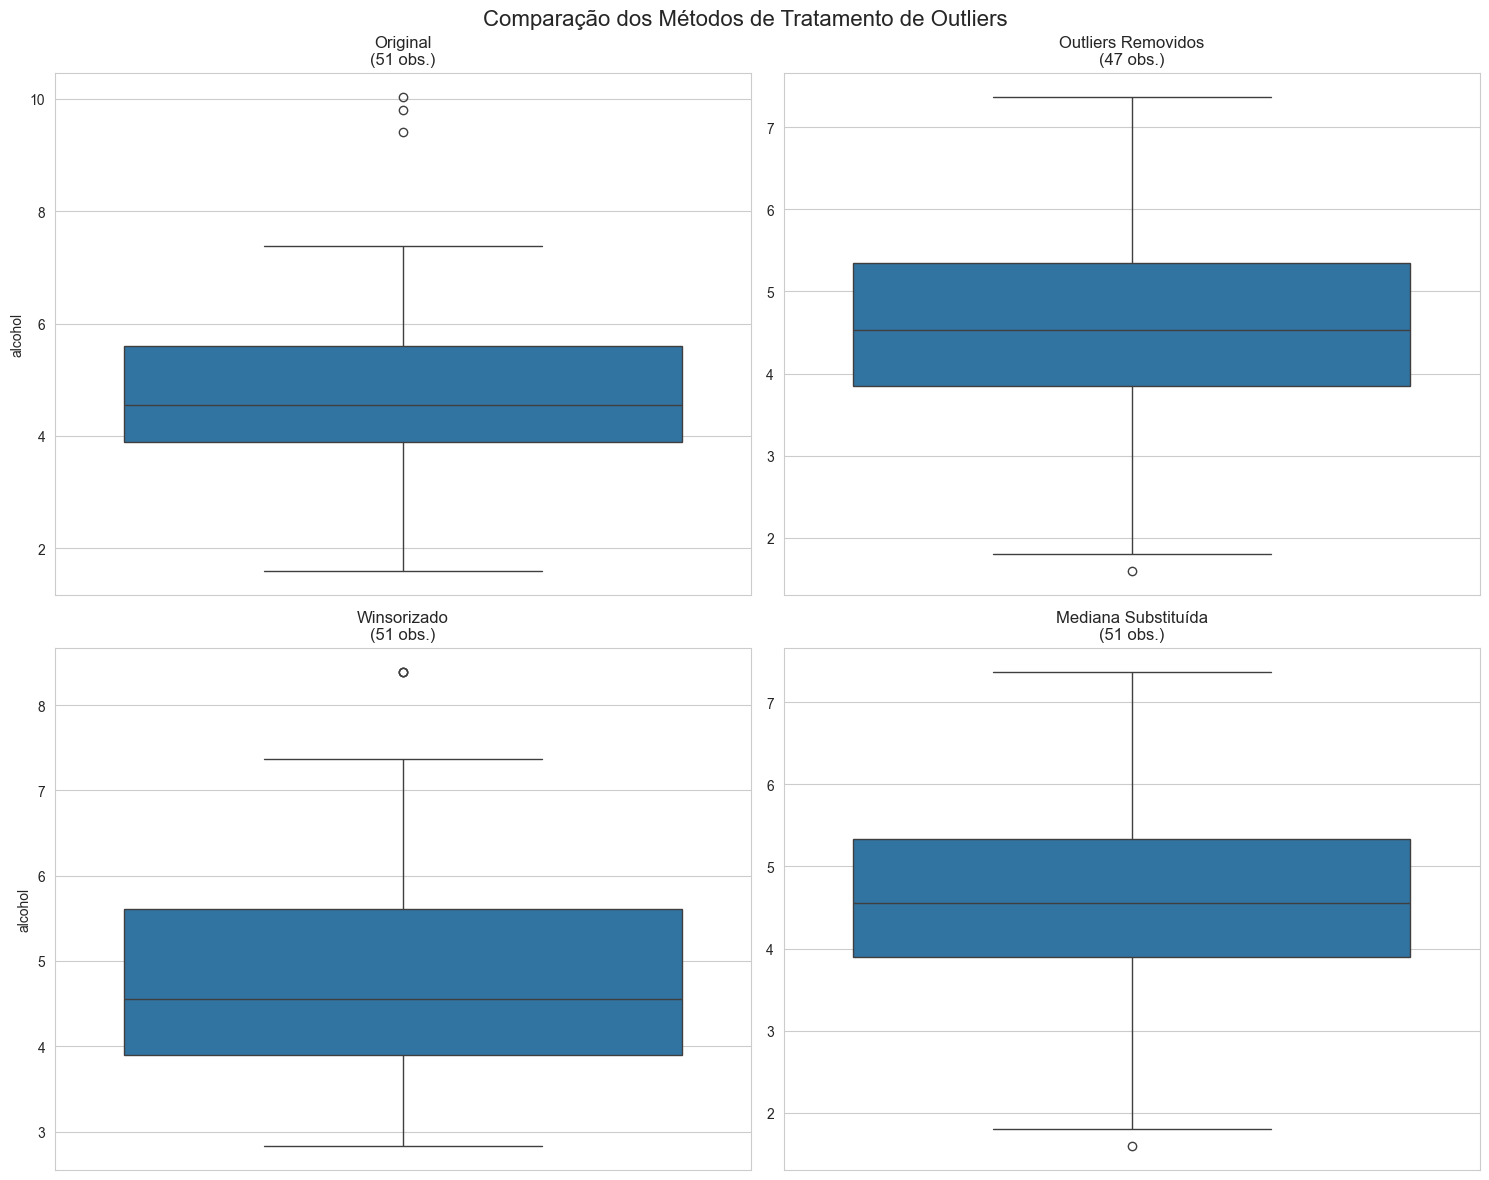


Estatísticas da coluna "alcohol" após tratamentos:

Original:
  Média: 4.887
  Mediana: 4.554
  Desvio padrão: 1.729
  Min: 1.593, Max: 10.038

Outliers Removidos:
  Média: 4.564
  Mediana: 4.525
  Desvio padrão: 1.261
  Min: 1.593, Max: 7.372

Winsorizado:
  Média: 4.852
  Mediana: 4.554
  Desvio padrão: 1.436
  Min: 2.827, Max: 8.394

Mediana Substituída:
  Média: 4.581
  Mediana: 4.554
  Desvio padrão: 1.216
  Min: 1.593, Max: 7.372



In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comparação dos Métodos de Tratamento de Outliers', fontsize=16)

col_to_plot = 'alcohol'

datasets_names = ['original', 'removed_outliers', 'winsorized', 'median_replaced']
titles = ['Original', 'Outliers Removidos', 'Winsorizado', 'Mediana Substituída']

for i, (name, title) in enumerate(zip(datasets_names, titles)):
    row = i // 2
    col = i % 2
    
    sns.boxplot(data=datasets_treated[name], y=col_to_plot, ax=axes[row, col])
    axes[row, col].set_title(f'{title}\n({datasets_treated[name].shape[0]} obs.)')
    axes[row, col].set_ylabel(col_to_plot if col == 0 else '')

plt.tight_layout()
plt.show()

print(f'\nEstatísticas da coluna "{col_to_plot}":\n')
for name, title in zip(datasets_names, titles):
    data = datasets_treated[name][col_to_plot]
    print(f'{title}:')
    print(f'  Média: {data.mean():.3f}')
    print(f'  Mediana: {data.median():.3f}')
    print(f'  Desvio padrão: {data.std():.3f}')
    print(f'  Min: {data.min():.3f}, Max: {data.max():.3f}')
    print()